# 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. Please just use this notebook to complete the assignment.

If your group consists of students from different classes, upload in **both** classes.

The first cell does some preprocessing. Please just run these cells and do not change anything. The assignment starts below. Make sure that listings.csv' is in the same folder as this notebook




,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,1
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,1
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,0
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,1


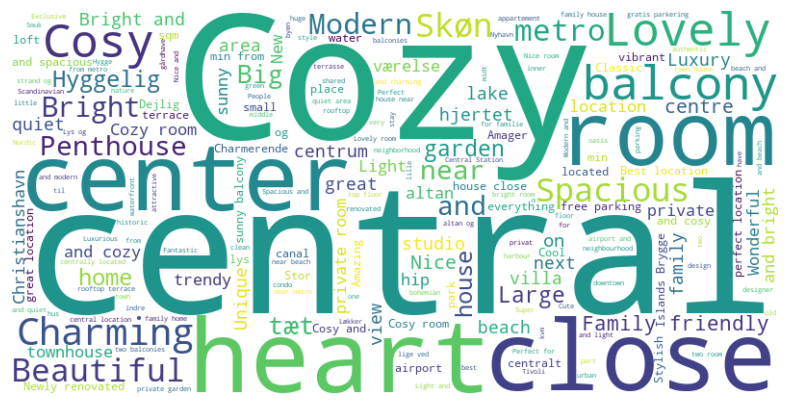

In [7]:
# pip install pandas
# pip install scikit-learn
import pandas as pd
import sklearn as sk

# load the data
data = pd.read_csv('listings.csv')

# filter relevant columns
data_limited = data[["id",
    "name",
    "host_id"  ,
    "host_name" , 
    "neighbourhood_cleansed"  ,
    "latitude"  ,
    "longitude"  ,
    "room_type"  ,
    "price"  ,
    "minimum_nights"  ,
    "number_of_reviews",  
    "last_review"  ,
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",]]

# removing rows with no reviews

data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0]

# remove nan

data_filtered = data_filtered.dropna()
data_filtered.head()

# get a list of distinct values from neighbourhood_cleansed columns in data_filtered

neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# replace e.g. Nrrbro with Nørrebro in neighbourhood_cleansed column

data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# Remove dollar signs and commas and convert to float - note the prices are actually in DKK
data_filtered['price'] = data_filtered['price'].replace(r'[\$,]', '', regex=True).astype(float)

# Calculate the median price
median_price = data_filtered['price'].median()

# Create a new column 'price_category' with 0 for 'affordable' and 1 for 'expensive'
data_filtered['price_category'] = (data_filtered['price'] > median_price).astype(int)

display(data_filtered.head())

# Describe the apartments using a wordcloud
# Remember to install packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the two lists of stop words
stop_words = ['Østerbro', 'Copenhagen', 'København', 'in', 'bedroom', 'bedrooms', 'bed', 'beds', 'bath', 'baths', 'Frederiksberg', 'V', 'Ø', 'SV', 'S', 'N', 'K', 'C', 'W', 'kbh', 'Ballerup', 'Hellerup', 'Valby', 'Vanløse', 'Brønhøj', 'Nørrebro', 'Vesterbro', "CPH", "with", "to", "of", "a", "the", "på", "i", "med", "af", "at", "city", "by", "apartment", "appartment", "lejlighed", "flat", "m2", "apt"]

# Convert the 'name' column to a single string
text = ' '.join(data_filtered['name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Your tasks start here


### 1. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?


host_names with occurrences:

      host_name  occurrences
1336      Mette          131
352   Christian          116
953       Julie          107
1247      Maria          104
133        Anne           96
...         ...          ...
818       Isuru            1
817        Isis            1
816        Isak            1
811       Isaac            1
2076       Ümit            1

[2077 rows x 2 columns]


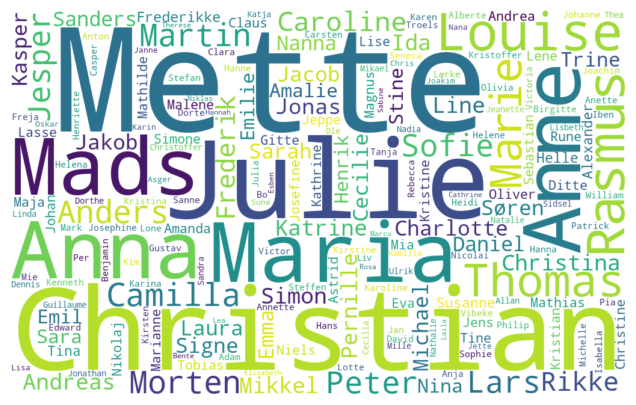


Total number of entries in calculated host_name dataset:  10328 

      host_name  occurrences  dataset_freq  dst_freq
1336      Mette          131      0.012684  0.006397
352   Christian          116      0.011232  0.006287
953       Julie          107      0.010360  0.003673
1247      Maria          104      0.010070  0.005059
133        Anne           96      0.009295  0.007338
123        Anna           96      0.009295  0.005626
1189       Mads           94      0.009101  0.005394
1164     Louise           92      0.008908  0.003997
1620     Rasmus           92      0.008908  0.005078
1912     Thomas           91      0.008811  0.007031
299     Camilla           85      0.008230  0.004111
1409     Morten           82      0.007940  0.005637
1282     Martin           82      0.007940  0.006197
90       Anders           82      0.007940  0.005585
1087       Lars           79      0.007649  0.007262
1566      Peter           78      0.007552  0.007809
897      Jesper           77    

In [80]:
# We continue working with the data that has already previously been somewhat filtered:
data_with_neighborhoods_cleansed = data_filtered

# For the word-cloud, we focus solely on first names. So any entry that contains a space " " must be filtered out. This will remove host_names like "Anja & Victor" or "Christian Egelund":
data_with_host_names_cleansed = data_with_neighborhoods_cleansed.loc[~data_with_neighborhoods_cleansed['host_name'].str.contains(" ", na=False)]

# Now we figure out how many times each host_name appears:
## Clean the dataset, leaving only a list of host_names:
data_host_name_frequency = data_with_host_names_cleansed[[
    "host_name" , ]]

## Compact any names that span first names and last names to only consist of first name. Also remove any instances such as "Nikolaj,", so it becomes "Nikolaj".
data_host_name_frequency.loc[:,'host_name'] = data_with_host_names_cleansed['host_name'].str.split().str[0]
data_host_name_frequency.loc[:,'host_name'] = data_host_name_frequency['host_name'].str.strip(", ")

## Remove any identified non-names from the data set:
non_names = ['Into', 'Rent', 'Forenom', 'Hotel', 'City', 'Silk', 'Round', 'Danhostel', 'Downtown', 'VG5', 'Chaudhry.', 'HideAway', '(Email', 'Copenhagen', 'Kings', 'Retreat', 'The', 'Artist', 'Little', 'Living', 'Studio', 'Sun', 'N', 'Peer', 'Tivoli', 'Hr', 'G.', 'Family', 'Familien', 'nan' , 'ApartmentinCopenhagen', 'den', 'SleepCph', 'Charlottehaven', 'CityHost', 'Jjj', 'M', 'Royal']

## Note: The tilde (~) means "NOT" in this context, so it rebuilds the dataset with host_names where they are NOT illegal names:
data_host_name_frequency.loc[:,'host_name'] = data_host_name_frequency[~data_host_name_frequency['host_name'].isin(non_names)]

## Group the host_names together and count how many of each name occurs:
data_host_name_frequency_grouped = data_host_name_frequency.groupby('host_name').size().reset_index(name='occurrences')

## Display the grouped data, for visual inspection:
pd.set_option('display.max_rows', 20)
print("\nhost_names with occurrences:\n")
print(data_host_name_frequency_grouped.sort_values('occurrences', ascending=False))

# Build a wordcloud with the identified names:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Convert the 'host_name' column to a dictionary, so we can use the wordcloud function generate_from_frequencies, since we already grouped and counted similar names.
word_frequencies = dict(zip(data_host_name_frequency_grouped['host_name'], data_host_name_frequency_grouped['occurrences']))

## Create and generate a word cloud image
wordcloud = WordCloud(background_color="white", width=1024, height=640).generate_from_frequencies(word_frequencies)

## Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Now lets compare the identified names with the frequency from Danmarks statistic.
# The plan is to create a new column containing the frequency for the known names from Danmarks statistic
# and joining this with the earlier grouped data.
# The used data set is from 1. January 2024 (https://www.dst.dk/da/Statistik/emner/borgere/navne/hvor-mange-hedder)

citizens_in_denmark_2024 = 5961249 # Declared here: https://www.dst.dk/da/Statistik/emner/borgere/befolkning/befolkningstal
danish_statictics_names = ['Anne', 'Mette', 'Kirsten', 'Hanne', 'Anna', 'Helle', 'Maria', 'Susanne', 'Lene', 'Marianne', 'Camilla', 'Lone', 'Louise', 'Pia', 'Charlotte', 'Tina', 'Gitte', 'Ida', 'Jette', 'Julie', 'Peter', 'Michael', 'Lars', 'Jens', 'Thomas', 'Henrik', 'Søren', 'Christian', 'Martin', 'Jan', 'Morten', 'Jesper', 'Anders', 'Mads', 'Niels', 'Rasmus', 'Mikkel', 'Per', 'Kim', 'Hans']

### Note: The actual frequencies are divided with the population size, to ensure that the frequencies we use to compare with the names in the data set are comparable.
danish_statistics_frequency = [43741/citizens_in_denmark_2024,
                               38133/citizens_in_denmark_2024,
                               36401/citizens_in_denmark_2024,
                               35725/citizens_in_denmark_2024,
                               33537/citizens_in_denmark_2024,
                               33094/citizens_in_denmark_2024,
                               30158/citizens_in_denmark_2024,
                               30129/citizens_in_denmark_2024,
                               29784/citizens_in_denmark_2024,
                               26032/citizens_in_denmark_2024,
                               24507/citizens_in_denmark_2024,
                               24339/citizens_in_denmark_2024,
                               23830/citizens_in_denmark_2024,
                               23630/citizens_in_denmark_2024,
                               23512/citizens_in_denmark_2024,
                               22969/citizens_in_denmark_2024,
                               22619/citizens_in_denmark_2024,
                               21966/citizens_in_denmark_2024,
                               21908/citizens_in_denmark_2024,
                               21893/citizens_in_denmark_2024,
                               46552/citizens_in_denmark_2024,
                               44338/citizens_in_denmark_2024,
                               43290/citizens_in_denmark_2024,
                               42123/citizens_in_denmark_2024,
                               41914/citizens_in_denmark_2024,
                               40996/citizens_in_denmark_2024,
                               38745/citizens_in_denmark_2024,
                               37480/citizens_in_denmark_2024,
                               36944/citizens_in_denmark_2024,
                               36134/citizens_in_denmark_2024,
                               33601/citizens_in_denmark_2024,
                               33394/citizens_in_denmark_2024,
                               33292/citizens_in_denmark_2024,
                               32153/citizens_in_denmark_2024,
                               32035/citizens_in_denmark_2024,
                               30269/citizens_in_denmark_2024,
                               29190/citizens_in_denmark_2024,
                               28700/citizens_in_denmark_2024,
                               28189/citizens_in_denmark_2024,
                               27709/citizens_in_denmark_2024]

## Combine the data from the Danish Statistics into a single data set:
danish_statistics_combined_data = pd.DataFrame({'Name': danish_statictics_names, 'Frequency': danish_statistics_frequency})

## Convert the new data set to a dictionary for quick lookup:
danish_statistics_dict = dict(zip(danish_statistics_combined_data['Name'], danish_statistics_combined_data['Frequency']))

## Calculate frequencies of the names in the previously built dataset:
total_data_entries = data_host_name_frequency_grouped['occurrences'].sum()
print("\nTotal number of entries in calculated host_name dataset: ", total_data_entries, "\n")

## We add a new column to the existing dataset called 'internal_frequency', so we get a percentage value for the frequency of each name in the data set.
data_host_name_frequency_grouped['dataset_freq'] = (data_host_name_frequency_grouped['occurrences'] / total_data_entries)

## Now we add the data from the danish statistics to the same dataset:
data_host_name_frequency_grouped['dst_freq'] = data_host_name_frequency_grouped['host_name'].map( lambda name: danish_statistics_dict.get(name, "No Data"))

## Now let's filter out the "No Data" entries so we can properly compare the dst frequencies with the airbnb host_name frequencies:
filtered_data_host_name_frequencies = data_host_name_frequency_grouped[~data_host_name_frequency_grouped['dst_freq'].isin(["No Data"])]

## Print the data to the console:
pd.set_option('display.max_rows', None)
print(filtered_data_host_name_frequencies.sort_values('occurrences', ascending=False))

## Question: Does this more or less correspond to the distribution of names according to Danmarks Statistic?

## Answer: No.
Looking at the dataset printed above, we can see that only 1/20 names are anywhere close to the dst frequencies. This being Tina. Thus, the data set significantly deviates from the name frequencies observed in the DST data

### 2. Using non-scaled versions of latitude and longitude, plot the listings data on a map.

                       id   latitude  longitude
0                    6983  55.686410  12.547410
1                   26057  55.693070  12.576490
2                   26473  55.676020  12.575400
3                   29118  55.670230  12.555040
4                   31094  55.666602  12.555283
...                   ...        ...        ...
13808  646726550705810749  55.739028  12.487433
13809  646941499450912133  55.730481  12.521243
13811  647809303952891559  55.667782  12.463285
13812  650819220455514228  55.659536  12.474726
13814  648436253362373119  55.731420  12.521770

[12126 rows x 3 columns]


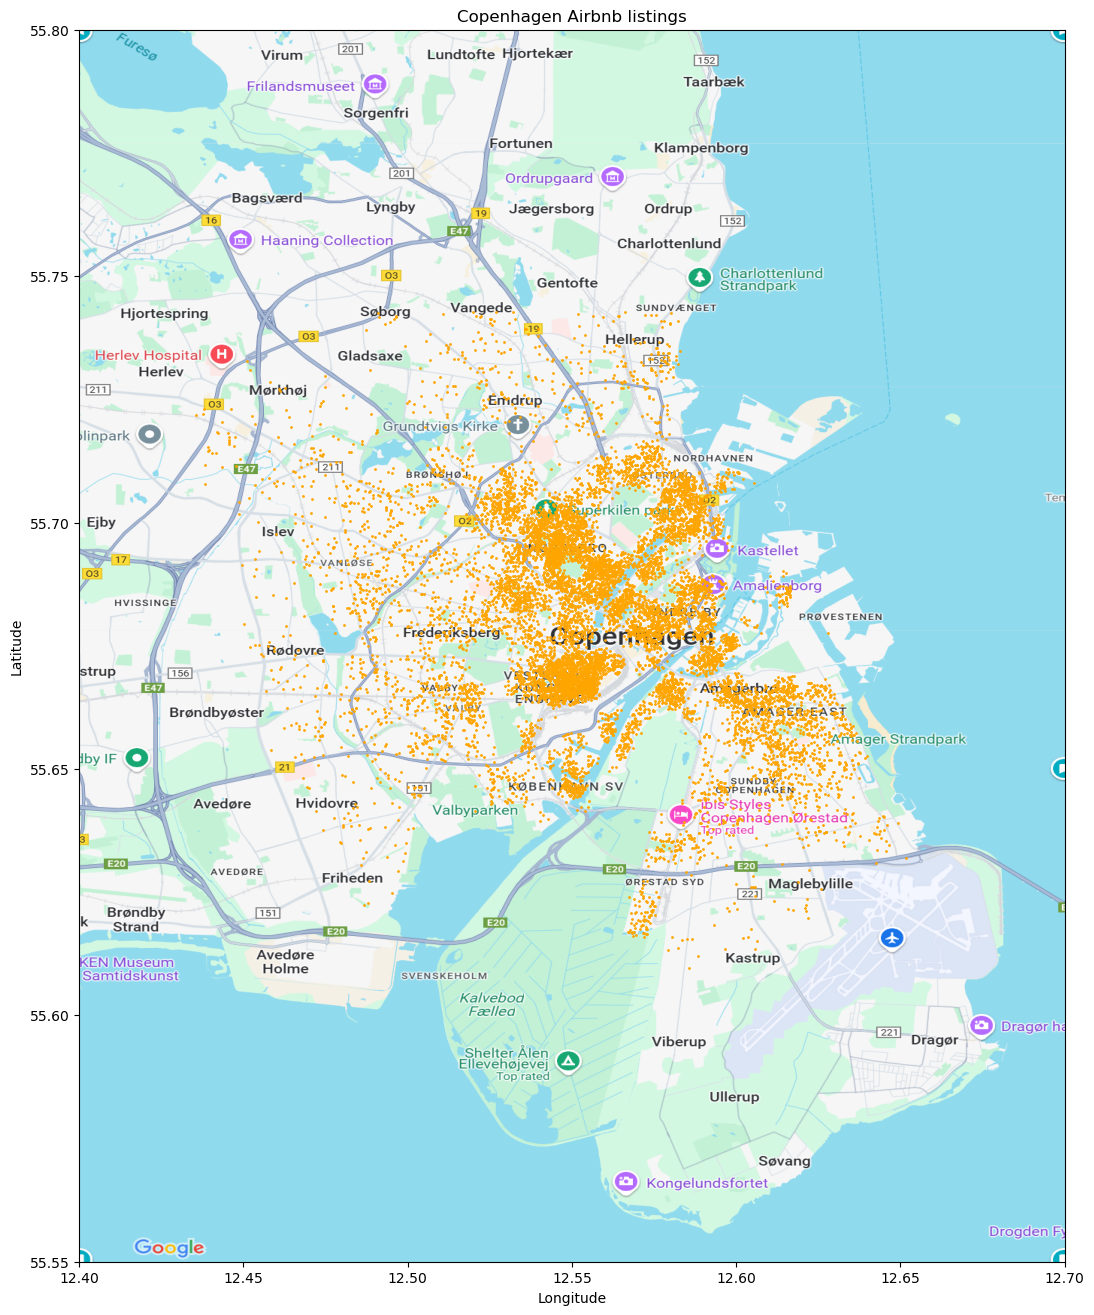

In [103]:
# We re-use the data that was initially filtered/cleaned:
data_with_neighborhoods_cleansed = data_filtered

## Lets remove all non-relevant columns:
data_with_lon_lat = pd.DataFrame({'id': data_with_neighborhoods_cleansed['id'], 'latitude': data_with_neighborhoods_cleansed['latitude'], 'longitude': data_with_neighborhoods_cleansed['longitude'] })
pd.set_option('display.max_rows', 20)
print(data_with_lon_lat)

# Iterate through each entry in the data set and plot to x-axis array and y-axis array:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
x_axis = []
y_axis = []

# Here we define the x and y axis. Longitude = x-axis (horizontal values)
for row in data_with_lon_lat.itertuples():
    x_axis.append(row.longitude)
    y_axis.append(row.latitude)

# Here we load a Map of copenhagen that has been cut off at the corners [12.40;55.55], [12.40;55.80], [12.70;55.80], [12.40;55.55]
map_img = mpimg.imread("Copenhagen_Map.png")
min_x, max_x = 12.40, 12.70
min_y, max_y = 55.55, 55.80

fig, ax = plt.subplots(figsize=(20, 16))
ax.imshow(map_img, extent=[min_x, max_x, min_y, max_y], aspect=1.5)

ax.scatter(x_axis, y_axis, s=1, c="orange", alpha=1)
ax.set_xlim(min_x, max_x)
ax.set_ylim(min_y, max_y)

ax.set_title("Copenhagen Airbnb listings")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()

### 3. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

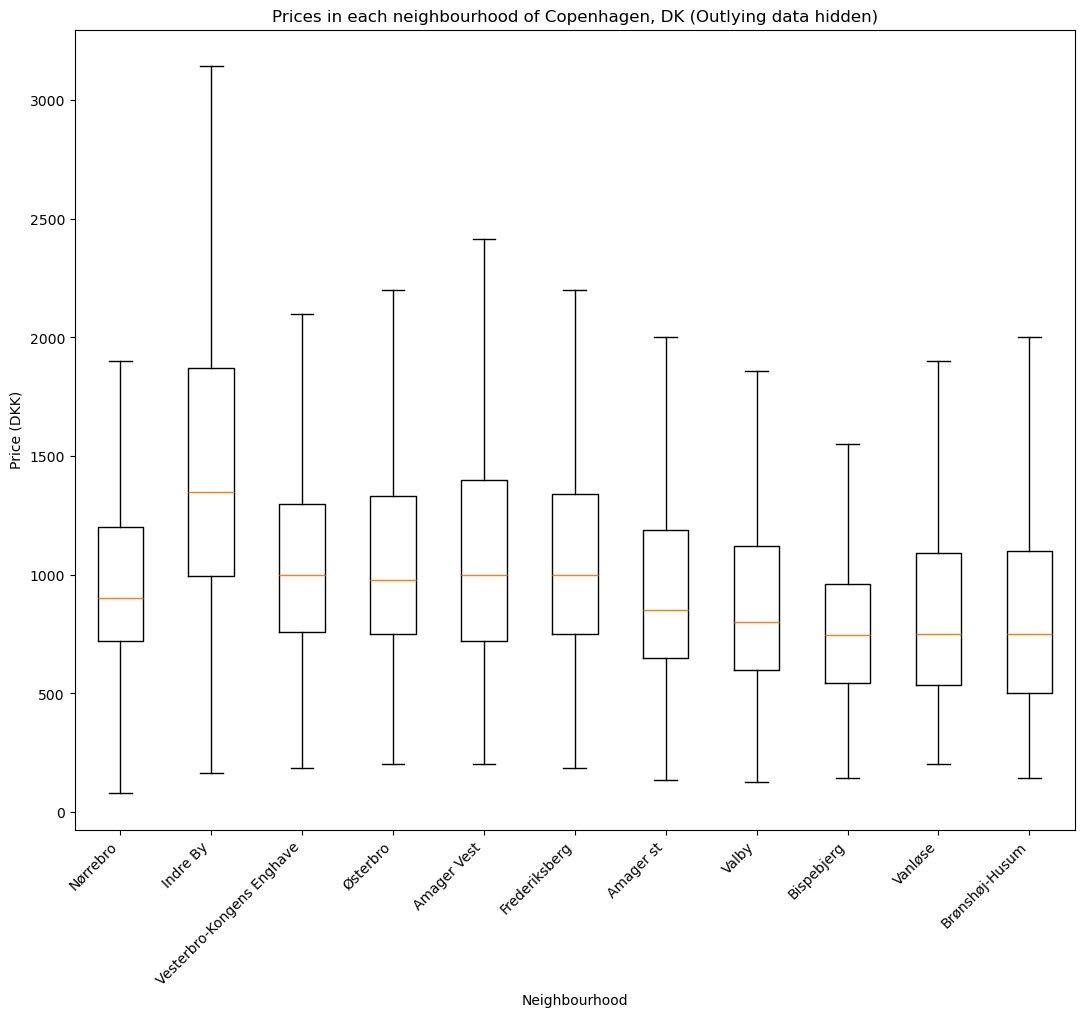

In [152]:
# We re-use the data that was initially filtered/cleaned:
data_with_neighborhoods_cleansed = data_filtered

# We iterate through each unique neighborhood and collect each neighborhoods collection of prices:
dataSets = dict()
for row in data_with_neighborhoods_cleansed.itertuples():
    if row.neighbourhood_cleansed in dataSets:
        dataSets[row.neighbourhood_cleansed].append(row.price)
    else:
        dataSets.update({row.neighbourhood_cleansed: [row.price]})

# We can now box plot the retrieved data:
import matplotlib.pyplot as plt
data = []
ticks = []
x_axis_names = []
for key in dataSets:
    data.append(dataSets.get(key))
    if key not in x_axis_names:
        x_axis_names.append(key)
        ticks.append(len(ticks))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_axes([0, 0, 1, 1])

bp = ax.boxplot(data, showfliers=False)
ax.set_xticklabels(x_axis_names, rotation=45, ha="right")

ax.set_xlabel("Neighbourhood")
ax.set_ylabel("Price (DKK)")
ax.set_title("Prices in each neighbourhood of Copenhagen, DK (Outlying data hidden)")

plt.show()


# Question:
What does this tell you about the listings in Copenhagen?
# Answer:
Price fluctuates the most in Indre By. It is also in Indre By that the most expensive Air BnB's are located. The cheapest can be found in Bispebjerg, with Vanløse, Brønshøj-Husum and Valby being very close in median price.

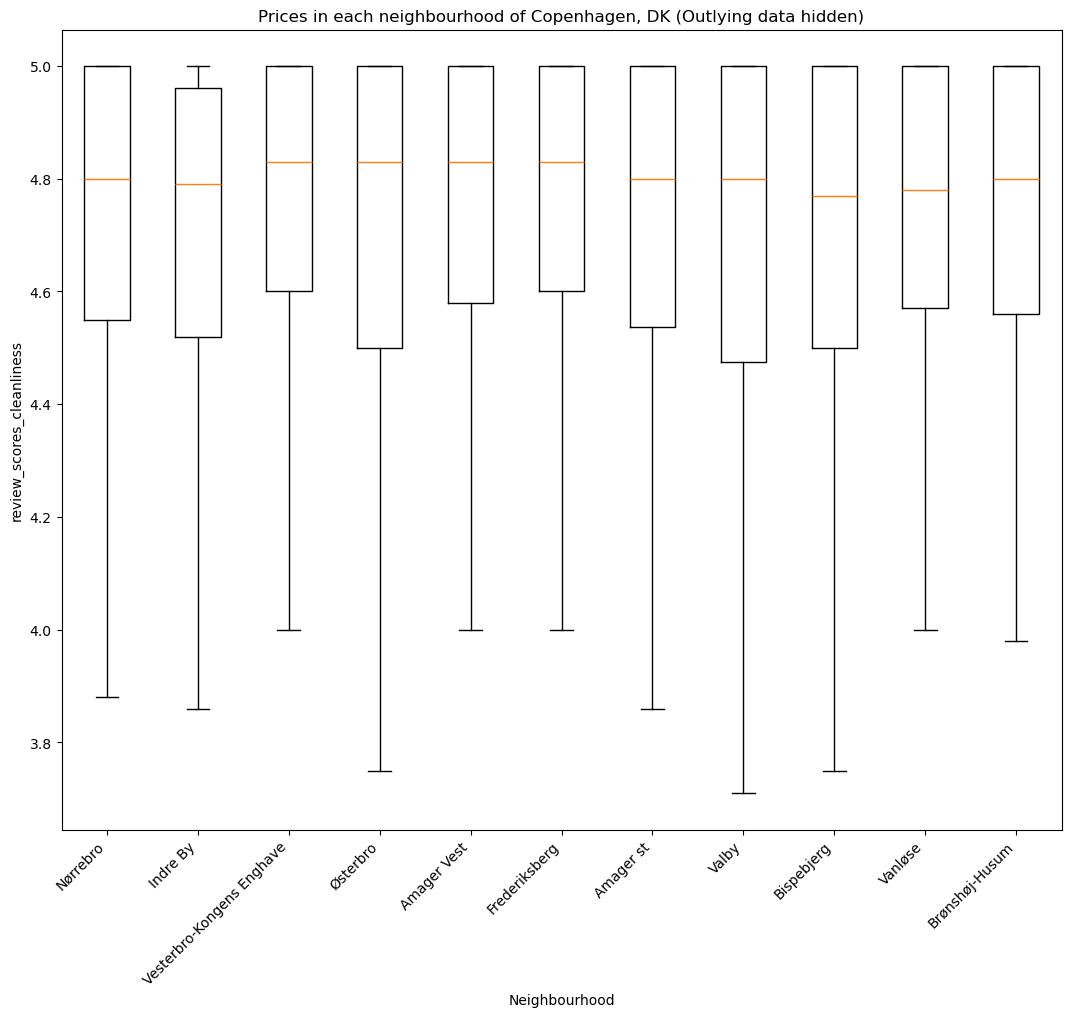

In [153]:
# Keeping the x-axis (neighborhood), we now compare with the 'review_scores_cleanliness' and see if that trend follows the previous graph:
# We re-use the data that was initially filtered/cleaned:
data_with_neighborhoods_cleansed = data_filtered

# We iterate through each unique neighborhood and collect each neighborhoods collection of prices:
dataSets = dict()
for row in data_with_neighborhoods_cleansed.itertuples():
    if row.neighbourhood_cleansed in dataSets:
        dataSets[row.neighbourhood_cleansed].append(row.review_scores_cleanliness)
    else:
        dataSets.update({row.neighbourhood_cleansed: [row.review_scores_cleanliness]})

# We can now box plot the retrieved data:
import matplotlib.pyplot as plt
data = []
ticks = []
x_axis_names = []
for key in dataSets:
    data.append(dataSets.get(key))
    if key not in x_axis_names:
        x_axis_names.append(key)
        ticks.append(len(ticks))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_axes([0, 0, 1, 1])

bp = ax.boxplot(data, showfliers=False)
ax.set_xticklabels(x_axis_names, rotation=45, ha="right")

ax.set_xlabel("Neighbourhood")
ax.set_ylabel("review_scores_cleanliness")
ax.set_title("Prices in each neighbourhood of Copenhagen, DK (Outlying data hidden)")

plt.show()

Interrestingly we can see how Indre By, which was the most expensive neighborhood, has the lowest cleanliness view score. I am surprised. Logic would dictate that the most expensive places had the best cleaning.

### 4. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

In [11]:
# State your solution here. Add more cells if needed.

### 5. Based on self-chosen features, and with "price_category" as your target, develop a k-Nearest Neighbor model to determine whether a rental property should be classified as 0 or 1. Remember to divide your data into training data and test data. Comment on your findings.

In [12]:
# State your solution here. Add more cells if needed.